In [1]:
# Import libraries
%reload_ext autoreload
%autoreload 2

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from IPython.display import display, HTML, Latex, Image, Video
from IPython.display import Markdown as md
from IPython.core.magic import register_cell_magic
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import mercury as mr
import datetime

# Allow for markdown code cells
@register_cell_magic
def markdown(line, cell):
    return md(cell.format(**globals()))

# When was last Friday?
last_friday = datetime.date.today() - pd.offsets.Week(weekday=4)

# Lab Information
defName   = "Your Name"
defCourse = "PHYS 2125 (15921)"
defSem    = "Spring 2025"
defDate   = last_friday.strftime("%Y-%m-%d")
defNum    = "9"
defLab    = "Simple Harmonic Motion (SHM)"
defObj    = "To determine the spring constant."
defQ1     = "What is your name? (5 pts)"
defQ2     = "What is your quest? (5 pts)"
defG_X    = '$m\; (kg)$'
defG_Y    = '$T^2\; (s^2)$'
defG_T    = '$T^2$ vs hanging mass $m$'
columns   = ["$m_a$ (kg)", "$m_{hook}$ (kg)", "$m$ (kg)", "$5T_1$ (s)", "$5T_2$ (s)", "$T_1$ (s)", "$T_2$ (s)", "$T$ (s)", "$T^2$ (s²)", "$k$ (N/m)"];
colIdx    = 2
fileName  = 'lab9.csv'

# Mercury App
app       = mr.App(title="Lab " + defNum + " - " + defLab, description="Lab report for " + defCourse + " " + defSem + " Lab " + defNum + ".")
name      = mr.Text(label="What is your name?",     value=defName, rows=1)
course    = mr.Text(label="What class are you in?", value=defCourse, rows=1)
date      = mr.Text(label="Lab Date",               value=defDate, rows=1)
labNum    = mr.Text(label="Lab Number",             value=defNum, rows=1)
labName   = mr.Text(label="Lab Name",               value=defLab, rows=1)
labObj    = mr.Text(label="Objective",              value=defObj, rows=3)
q1        = mr.Text(value="Question 1 Answer",      label=defQ1, rows=5)
q2        = mr.Text(value="Question 2 Answer",      label=defQ2, rows=5)
g_xaxis   = mr.Text(label="X-axis label",           value=defG_X, rows=1)
g_yaxis   = mr.Text(label="Y-axis label",           value=defG_Y, rows=1)
g_title   = mr.Text(label="Graph title",            value=defG_T, rows=1)
discuss   = mr.Text(value="Discussion",             label="Discuss", rows=5)
file      = mr.File(label="Data file upload",       max_file_size="10MB")

mercury.App

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.File

In [2]:
%autoreload 2

if file.filepath is not None:
    df = pd.read_csv(file.filepath, names=columns, header=0).set_index(columns[colIdx], drop=False)
else:
    df = pd.read_csv(fileName, names=columns, header=0).set_index(columns[colIdx], drop=False)

# Remove the last row
df = df.drop(df.index[-1])

# Save this for the graph
df_graph = df;

# Mean and StdDev across the board
mean = df.mean()
deviation = df.std(ddof=0)

# Calculate k_t from the table
k_t = mean[columns[9]];

# Calculate the trend line slope and intercept
trend = np.polyfit(df[columns[2]], df[columns[8]], 1)  # 1 for linear trendline
trend_slope, trend_intercept = trend

# Calculate μ_k from the graph
k_g = (4 * math.pow(math.pi, 2)) / trend_slope;

# Calculate % difference between u_k_table and u_k_graph
k_diff = abs( k_g - k_t ) / ( ( k_t + k_g ) / 2 )
k_t_dev = deviation[columns[7]];

# Remove the duplicate column
df = df.drop(columns=[columns[2]])

# Add the average value of k
df.loc['Average'] = {
    columns[1]: np.nan,
    columns[3]: np.nan,
    columns[4]: np.nan,
    columns[5]: np.nan,
    columns[6]: np.nan,
    columns[7]: np.nan,
    columns[8]: np.nan,
    columns[9]: k_t
};
# Add the standard devation value of u_k
df.loc['StdDev'] = {
    columns[1]: np.nan,
    columns[3]: np.nan,
    columns[4]: np.nan,
    columns[5]: np.nan,
    columns[6]: np.nan,
    columns[7]: np.nan,
    columns[8]: np.nan,
    columns[9]: k_t_dev
};

# Save this for the table
df_table = df.fillna('');

# Formatting
df[columns[0]] = df.apply(lambda row: f"{row[columns[0]]:.4f}", axis=1)
df[columns[1]] = df.apply(lambda row: f"{row[columns[1]]:.4f}", axis=1)
df[columns[3]] = df.apply(lambda row: f"{row[columns[3]]:.3f}", axis=1)
df[columns[4]] = df.apply(lambda row: f"{row[columns[4]]:.3f}", axis=1)
df[columns[5]] = df.apply(lambda row: f"{row[columns[5]]:.3f}", axis=1)
df[columns[6]] = df.apply(lambda row: f"{row[columns[6]]:.3f}", axis=1)
df[columns[7]] = df.apply(lambda row: f"{row[columns[7]]:.3f}", axis=1)
df[columns[8]] = df.apply(lambda row: f"{row[columns[8]]:.3f}", axis=1)
df[columns[9]] = df.apply(lambda row: f"{row[columns[9]]:.3f}", axis=1)

# Make some strings
k_t_str = str("%.3f" % round(k_t, 3))
k_t_dev_str = str("%.3f" % round(k_t_dev, 3))
k_g_str = str("%.3f" % round(k_g, 3))
k_diff_str = str("%.3f" % round(k_diff, 3))
trend_slope_str = str("%.3f" % round(trend_slope, 3))
trend_intercept_str = str("%.3f" % round(trend_intercept, 3))

In [3]:
%%markdown

# Lab {labNum.value}: {labName.value}
Name: **{name.value}** \
Class: **{course.value}** \
Date: **{date.value}**

<p style="page-break-after:always;"></p>

## Objective

{labObj.value}


# Lab 9: Simple Harmonic Motion (SHM)
Name: **Your Name** \
Class: **PHYS 2125 (15921)** \
Date: **2025-03-14**

<p style="page-break-after:always;"></p>

## Objective

To determine the spring constant.


## Equipment

- (1) small A-base
- (1) long metal rod
- (1) clamp
- (1) short rod
- (1) spring set
  - (3) spring with unknown $k$ value
  - (1) 5g hook
- (1) set of weights of known mass
- (1) stopwatch

## Theory

$T = 2 \pi \sqrt{\dfrac{m}{k}}$

$T^2 = 4 \pi^2 (\dfrac{m}{k})$

$T^2 = (\dfrac{4 \pi^2}{k}) \cdot m$

$k = 4 \pi^2 (\dfrac{m}{T^2})$

where

$T$ is the period of oscillation,

$M$ is the hanging mass, and

$k$ is the spring constant.

In [4]:
display(Image(url='https://raw.githubusercontent.com/dundonite/Physics-Lab-2125-15921/refs/heads/main/lab9.png', width=500))



<p style="page-break-after:always;"></p>

## Procedure

The following procedure was followed.

### Initial Setup

The pendulum was constructed as follows.

1. A small cast iron A-base was placed on the table.
1. A 45cm steel rod was secured into the A-frame, raised up as much as possible to maximize the height.
1. The vertical mounting side of a steel clamp was secured at the very top of the rod.
1. A 15cm rod was attached to the horizontal side of the same steel clamp, to the far end of the smaller rod.
1. A spring with unknown spring constant $k$ was hung near the middle of the smaller rod.

### Trial (completed for each $m_a$)

1. A mass $m_a$ was attached to the hook.
1. The mass was made to oscillate by pulling down on the weight with light-to-moderate force.
3. Twice a measurement was taken of the the time required to complete five (5) oscillations.
4. These values were recorded as $5T_1$ and $5T_2$.

<p style="page-break-after:always;"></p>

## Data

In [5]:
%autoreload 2
# Print the data table
#mr.Table(data=df_table, width="25px")
HTML(df_table.to_html(notebook=True,col_space=5))

,$m_a$ (kg),$m_{hook}$ (kg),$5T_1$ (s),$5T_2$ (s),$T_1$ (s),$T_2$ (s),$T$ (s),$T^2$ (s²),$k$ (N/m)
$m$ (kg),,,,,,,,,
0.035,0.03,0.005,3.24,3.32,0.648,0.664,0.656,0.430336,3.210851
0.045,0.04,0.005,3.77,3.8,0.754,0.76,0.757,0.573049,3.100134
0.055,0.05,0.005,4.2,4.14,0.84,0.828,0.834,0.695556,3.121694
0.065,0.06,0.005,4.57,4.53,0.914,0.906,0.91,0.8281,3.098777
0.075,0.07,0.005,4.8,4.92,0.96,0.984,0.972,0.944784,3.133924
0.085,0.08,0.005,4.99,4.99,0.998,0.998,0.998,0.996004,3.369129
Average,,,,,,,,,3.172418
StdDev,,,,,,,,,0.120283


<p style="page-break-after:always;"></p>

## Calculations

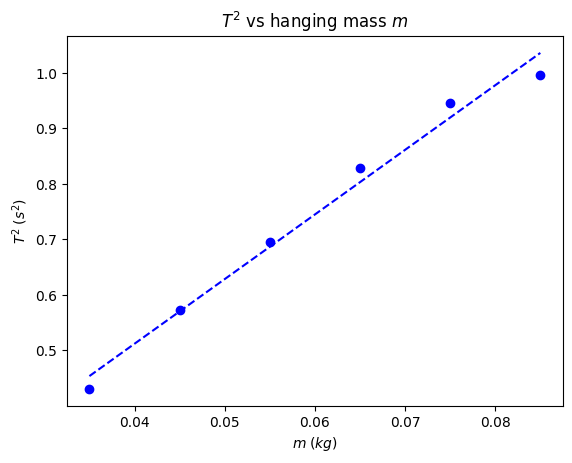

In [6]:
# Plot the measurements
plt.scatter(df_graph[columns[2]], df_graph[columns[8]], color="blue", marker="o");

# Plot the trendline
fit = np.polyval(trend, df_graph[columns[2]])
plt.plot(df_graph[columns[2]], fit, color="blue", linestyle="--")

# Add labels w LaTeX support
plt.xlabel(g_xaxis.value);
plt.ylabel(g_yaxis.value);
plt.title(g_title.value);
plt.rcParams['text.usetex'] = True;
plt.rcParams['font.family'] = 'serif';

# Show the graph
plt.show();

In [7]:
%%markdown

Using the least squares method a trend line is fit to the data with *slope* {trend_slope_str} and *$y$-intercept* {trend_intercept_str}, resulting in the equation $ y = {trend_slope_str} x + {trend_intercept_str} $.

## Results

The average value of $k$ was calculated as ${k_t_str}\; \pm\; {k_t_dev_str}$.

Using a least squares method $k$ was calculated as ${k_g_str}$.

These two values differ by ${k_diff_str}$%.

<p style="page-break-after:always;"></p>

## Discussion

{discuss.value}

## Questions

### {defQ1}

{q1.value}

### {defQ2}

{q2.value}


Using the least squares method a trend line is fit to the data with *slope* 11.646 and *$y$-intercept* 0.046, resulting in the equation $ y = 11.646 x + 0.046 $.

## Results

The average value of $k$ was calculated as $3.172\; \pm\; 0.120$.

Using a least squares method $k$ was calculated as $3.390$.

These two values differ by $0.066$%.

<p style="page-break-after:always;"></p>

## Discussion

Discussion

## Questions

### What is your name? (5 pts)

Question 1 Answer

### What is your quest? (5 pts)

Question 2 Answer
